In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [38]:
inside_data = pd.read_csv('wk5_classroom_data.csv')
inside_data

,Time,Temperature (C),Humidity (%),Pressure (hPa),Gas (Ohm),PM10,PM2.5,PM100
0,1.740782e+09,26.844844,42.897334,1001.815480,7015,9,9,9
1,1.740782e+09,27.063789,42.946715,1001.809448,12389,9,9,9
2,1.740782e+09,27.008125,42.663379,1001.838870,16409,9,9,9
3,1.740782e+09,26.942500,42.421462,1001.850125,20917,9,9,9
4,1.740782e+09,26.887031,42.235074,1001.859065,25221,9,9,9
...,...,...,...,...,...,...,...,...
295,1.740782e+09,24.266914,44.240647,1001.861295,145526,7,10,12
296,1.740782e+09,24.266914,44.234600,1001.861295,145022,7,10,11
297,1.740782e+09,24.267109,44.216482,1001.865065,145399,7,10,11
298,1.740782e+09,24.267500,44.204435,1001.874328,145022,7,10,11


In [39]:
outside_data = pd.read_csv('wk5_outside_data.csv')
outside_data

,Time,Temperature (C),Humidity (%),Pressure (hPa),Gas (Ohm),PM10,PM2.5,PM100
0,1.740783e+09,24.194453,46.025344,1001.598460,5665,8,11,11
1,1.740783e+09,24.426094,46.059154,1001.631455,10310,8,11,11
2,1.740783e+09,24.361250,45.849803,1001.643224,14351,8,11,11
3,1.740783e+09,24.306758,45.684661,1001.658295,19051,8,10,11
4,1.740783e+09,24.267891,45.521555,1001.676775,23994,8,10,11
...,...,...,...,...,...,...,...,...
340,1.740784e+09,24.273555,42.305323,1000.603815,162938,12,21,23
341,1.740784e+09,24.284102,42.342375,1000.609168,163894,12,21,23
342,1.740784e+09,24.296211,42.355689,1000.611930,162149,13,22,25
343,1.740784e+09,24.310859,42.399195,1000.608543,163096,13,22,25


In [40]:
inside_data_other = pd.read_csv('SensorsInside.csv')
inside_data_other

,Current Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),PM1.0 (standard),PM2.5 (standard),PM10 (standard),PM1.0 (env),PM2.5 (env),PM10 (env),Particles >0.3um,Particles >0.5um,Particles >1.0um,Particles >2.5um,Particles >5.0um,Particles >10um
0,2025-02-21 16:47:00,34.126875,29436,100.000000,702.802141,2981.268160,1,1,1,1,1,1,390,101,9,0,0,0
1,2025-02-21 16:47:01,23.311641,13676,39.066702,1009.757102,29.121433,1,1,1,1,1,1,390,101,9,0,0,0
2,2025-02-21 16:47:02,23.319844,25747,39.009050,1009.772505,28.992833,1,1,1,1,1,1,390,101,9,0,0,0
3,2025-02-21 16:47:03,23.320430,38003,38.927240,1009.790697,28.840951,1,1,2,1,1,2,396,103,12,1,1,0
4,2025-02-21 16:47:04,23.327461,49055,38.857826,1009.802425,28.743042,1,1,2,1,1,2,396,103,12,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2025-02-21 16:51:57,23.991523,175577,36.257617,1009.869312,28.184634,2,4,4,2,4,4,507,142,32,3,1,0
346,2025-02-21 16:51:58,23.996016,175209,36.235049,1009.864737,28.222832,2,4,4,2,4,4,507,142,32,3,1,0
347,2025-02-21 16:51:58,23.989961,175209,36.234453,1009.863261,28.235147,2,4,4,2,4,4,507,142,32,3,1,0
348,2025-02-21 16:51:59,23.994062,175945,36.234857,1009.852865,28.321941,2,4,4,2,4,4,531,145,31,3,1,0


In [41]:
outside_data_other = pd.read_csv('SensorsOutside.csv')
outside_data_other

,Current Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),PM1.0 (standard),PM2.5 (standard),PM10 (standard),PM1.0 (env),PM2.5 (env),PM10 (env),Particles >0.3um,Particles >0.5um,Particles >1.0um,Particles >2.5um,Particles >5.0um,Particles >10um
0,2025-02-21 16:27:16,34.779805,76256,100.000000,796.718974,1982.455609,1,3,3,1,3,3,450,118,20,1,0,0
1,2025-02-21 16:27:16,24.497773,26330,38.850285,1009.862859,28.238508,1,3,3,1,3,3,450,118,20,1,0,0
2,2025-02-21 16:27:17,24.744453,44404,38.935620,1009.885982,28.045468,1,3,3,1,3,3,450,118,20,1,0,0
3,2025-02-21 16:27:18,24.715156,56349,38.777891,1009.904862,27.887859,2,2,2,2,2,2,480,128,20,0,0,0
4,2025-02-21 16:27:19,24.675703,67798,38.643032,1009.917293,27.784089,2,2,2,2,2,2,480,128,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2025-02-21 16:34:12,18.439961,217590,46.204851,1008.885189,36.403582,1,3,4,1,3,4,414,124,32,3,2,2
485,2025-02-21 16:34:13,18.427852,215596,46.184975,1008.892392,36.343398,1,3,4,1,3,4,414,124,32,3,2,2
486,2025-02-21 16:34:14,18.428242,216731,46.191185,1008.889622,36.366541,1,3,4,1,3,4,438,125,33,3,2,2
487,2025-02-21 16:34:15,18.430781,218892,46.160648,1008.893849,36.331225,1,3,4,1,3,4,438,125,33,3,2,2


In [42]:
#TIME SERIES

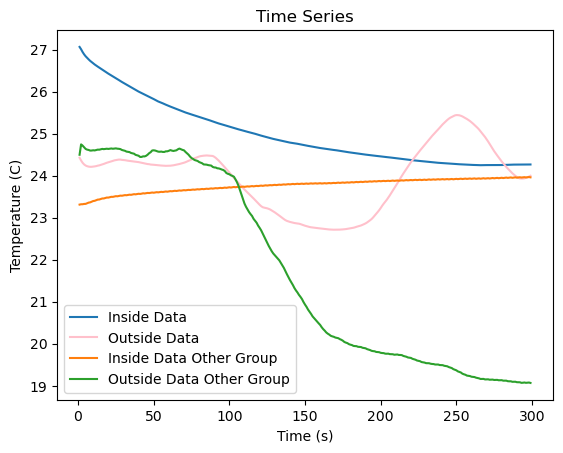

Average inside temp (C): 24.987762855351168
Average outside temp (C): 23.972576818561873
STD inside temp (C): 0.7439041635070531
STD outside temp (C): 0.7841322442192721
Mean Uncertainty inside temp (C): 0.04302108857079843
Mean Uncertainty inside temp (C): 0.04534753854682036
Average inside temp (C) other group: 23.765150372608698
Average outside temp (C) other group: 21.72739888297659
STD inside temp (C) other group: 0.15896101023963866
STD outside temp (C) other group: 2.2511368040311797
Mean Uncertainty inside temp (C) other group: 0.009192952582202145
Mean Uncertainty inside temp (C) other group: 0.13018660276699912


In [43]:
#temp
plt.plot(inside_data["Temperature (C)"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["Temperature (C)"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["Temperature (C)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["Temperature (C)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('Temperature (C)')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside temp (C):",np.mean(inside_data["Temperature (C)"].iloc[1:300]))
print("Average outside temp (C):",np.mean(outside_data["Temperature (C)"].iloc[1:300]))
print("STD inside temp (C):",np.std(inside_data["Temperature (C)"].iloc[1:300]))
print("STD outside temp (C):",np.std(outside_data["Temperature (C)"].iloc[1:300]))
print("Mean Uncertainty inside temp (C):",(np.std(inside_data["Temperature (C)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside temp (C):",(np.std(outside_data["Temperature (C)"].iloc[1:300]))/np.sqrt(299))

print("Average inside temp (C) other group:",np.mean(inside_data_other["Temperature (C)"].iloc[1:300]))
print("Average outside temp (C) other group:",np.mean(outside_data_other["Temperature (C)"].iloc[1:300]))
print("STD inside temp (C) other group:",np.std(inside_data_other["Temperature (C)"].iloc[1:300]))
print("STD outside temp (C) other group:",np.std(outside_data_other["Temperature (C)"].iloc[1:300]))
print("Mean Uncertainty inside temp (C) other group:",(np.std(inside_data_other["Temperature (C)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside temp (C) other group:",(np.std(outside_data_other["Temperature (C)"].iloc[1:300]))/np.sqrt(299))

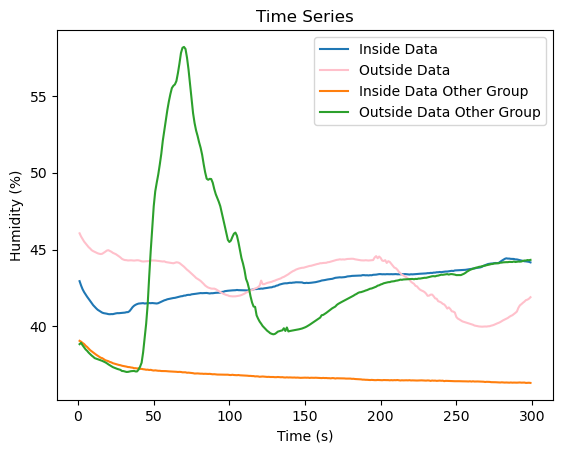

Average inside humidity (%): 42.76270687063147
Average outside humidity (%): 43.03976036466326
STD inside humidity (%): 0.9549757337601661
STD outside humidity (%): 1.4994398860207097
Mean Uncertainty inside humidity (%): 0.055227672649892076
Mean Uncertainty inside humidity (%): 0.08671484756715338
Average inside humidity (%) other group: 36.82455757491639
Average outside humidity (%) other group: 43.38535661331104
STD inside humidity (%) other group: 0.5120208856902423
STD outside humidity (%) other group: 4.692093968778796
Mean Uncertainty inside humidity (%) other group: 0.029610932367324653
Mean Uncertainty inside humidity (%) other group: 0.2713508004333515


In [44]:
#humidity
plt.plot(inside_data["Humidity (%)"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["Humidity (%)"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["Humidity (%)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["Humidity (%)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('Humidity (%)')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside humidity (%):",np.mean(inside_data["Humidity (%)"].iloc[1:300]))
print("Average outside humidity (%):",np.mean(outside_data["Humidity (%)"].iloc[1:300]))
print("STD inside humidity (%):",np.std(inside_data["Humidity (%)"].iloc[1:300]))
print("STD outside humidity (%):",np.std(outside_data["Humidity (%)"].iloc[1:300]))
print("Mean Uncertainty inside humidity (%):",(np.std(inside_data["Humidity (%)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside humidity (%):",(np.std(outside_data["Humidity (%)"].iloc[1:300]))/np.sqrt(299))

print("Average inside humidity (%) other group:",np.mean(inside_data_other["Humidity (%)"].iloc[1:300]))
print("Average outside humidity (%) other group:",np.mean(outside_data_other["Humidity (%)"].iloc[1:300]))
print("STD inside humidity (%) other group:",np.std(inside_data_other["Humidity (%)"].iloc[1:300]))
print("STD outside humidity (%) other group:",np.std(outside_data_other["Humidity (%)"].iloc[1:300]))
print("Mean Uncertainty inside humidity (%) other group:",(np.std(inside_data_other["Humidity (%)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside humidity (%) other group:",(np.std(outside_data_other["Humidity (%)"].iloc[1:300]))/np.sqrt(299))

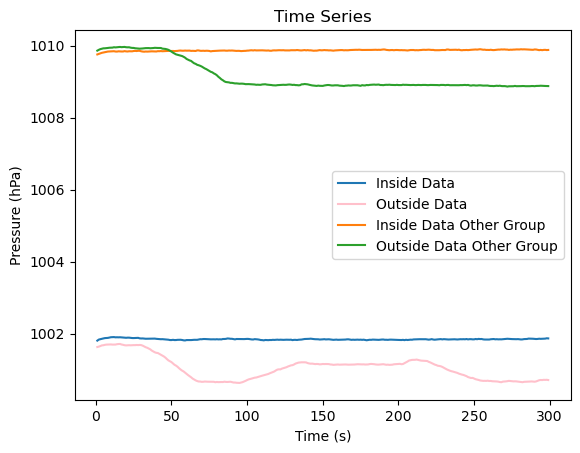

Average inside pressure (hPa): 1001.8473094482531
Average outside pressure (hPa): 1001.0476287805681
STD inside pressure (hPa): 0.017662437111490896
STD outside pressure (hPa): 0.3233676150134457
Mean Uncertainty inside Pressure (hPa): 0.0010214451116489854
Mean Uncertainty inside Pressure (hPa): 0.01870083202765862
Average inside pressure (hPa) other group: 1009.8696091839464
Average outside pressure (hPa) other group: 1009.1396701538459
STD inside pressure (hPa) other group: 0.019446736142901117
STD outside pressure (hPa) other group: 0.40201163440424914
Mean Uncertainty inside Pressure (hPa) other group: 0.0011246337889447284
Mean Uncertainty inside Pressure (hPa) other group: 0.02324893310001304


In [45]:
#pressure 
plt.plot(inside_data["Pressure (hPa)"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["Pressure (hPa)"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["Pressure (hPa)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["Pressure (hPa)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('Pressure (hPa)')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside pressure (hPa):",np.mean(inside_data["Pressure (hPa)"].iloc[1:300]))
print("Average outside pressure (hPa):",np.mean(outside_data["Pressure (hPa)"].iloc[1:300]))
print("STD inside pressure (hPa):",np.std(inside_data["Pressure (hPa)"].iloc[1:300]))
print("STD outside pressure (hPa):",np.std(outside_data["Pressure (hPa)"].iloc[1:300]))
print("Mean Uncertainty inside Pressure (hPa):",(np.std(inside_data["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Pressure (hPa):",(np.std(outside_data["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))

print("Average inside pressure (hPa) other group:",np.mean(inside_data_other["Pressure (hPa)"].iloc[1:300]))
print("Average outside pressure (hPa) other group:",np.mean(outside_data_other["Pressure (hPa)"].iloc[1:300]))
print("STD inside pressure (hPa) other group:",np.std(inside_data_other["Pressure (hPa)"].iloc[1:300]))
print("STD outside pressure (hPa) other group:",np.std(outside_data_other["Pressure (hPa)"].iloc[1:300]))
print("Mean Uncertainty inside Pressure (hPa) other group:",(np.std(inside_data_other["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Pressure (hPa) other group:",(np.std(outside_data_other["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))

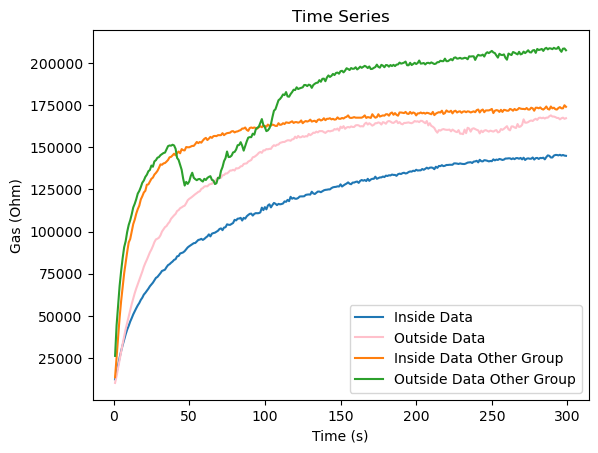

Average inside gas (Ohm): 117189.51505016722
Average outside gas (Ohm): 143406.5016722408
STD inside gas (Ohm): 28728.441415366204
STD outside gas (Ohm): 32445.12765585169
Mean Uncertainty inside Gas (Ohm): 1661.4086642623624
Mean Uncertainty inside Gas (Ohm): 1876.350179292985
Average inside gas (Ohm) other group: 158883.90301003345
Average outside gas (Ohm) other group: 176159.60535117055
STD inside gas (Ohm) other group: 23537.724033763116
STD outside gas (Ohm) other group: 34207.61901536615
Mean Uncertainty inside Gas (Ohm) other group: 1361.2217273225854
Mean Uncertainty inside Gas (Ohm) other group: 1978.2776863598542


In [46]:
#Gas (Ohm)
plt.plot(inside_data["Gas (Ohm)"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["Gas (Ohm)"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["Gas (ohm)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["Gas (ohm)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('Gas (Ohm)')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside gas (Ohm):",np.mean(inside_data["Gas (Ohm)"].iloc[1:300]))
print("Average outside gas (Ohm):",np.mean(outside_data["Gas (Ohm)"].iloc[1:300]))
print("STD inside gas (Ohm):",np.std(inside_data["Gas (Ohm)"].iloc[1:300]))
print("STD outside gas (Ohm):",np.std(outside_data["Gas (Ohm)"].iloc[1:300]))
print("Mean Uncertainty inside Gas (Ohm):",(np.std(inside_data["Gas (Ohm)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Gas (Ohm):",(np.std(outside_data["Gas (Ohm)"].iloc[1:300]))/np.sqrt(299))

print("Average inside gas (Ohm) other group:",np.mean(inside_data_other["Gas (ohm)"].iloc[1:300]))
print("Average outside gas (Ohm) other group:",np.mean(outside_data_other["Gas (ohm)"].iloc[1:300]))
print("STD inside gas (Ohm) other group:",np.std(inside_data_other["Gas (ohm)"].iloc[1:300]))
print("STD outside gas (Ohm) other group:",np.std(outside_data_other["Gas (ohm)"].iloc[1:300]))
print("Mean Uncertainty inside Gas (Ohm) other group:",(np.std(inside_data_other["Gas (ohm)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Gas (Ohm) other group:",(np.std(outside_data_other["Gas (ohm)"].iloc[1:300]))/np.sqrt(299))

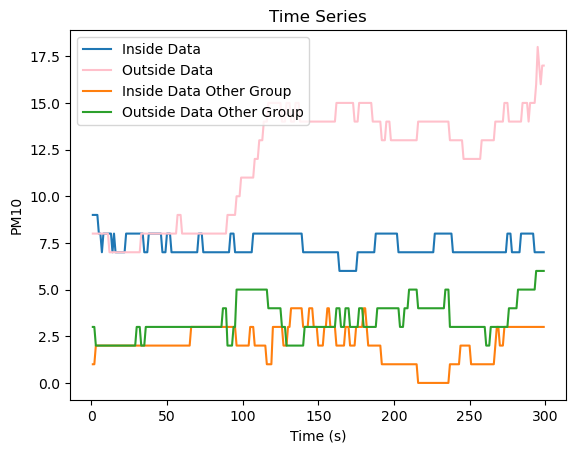

Average inside PM10: 7.357859531772576
Average outside PM10: 11.896321070234114
STD inside PM10: 0.5803615241065916
STD outside PM10: 2.948717737975559
Mean Uncertainty inside PM10: 0.0335631735329527
Mean Uncertainty inside PM10: 0.17052874980249813
Average inside PM10 other group: 2.0936454849498327
Average outside PM10 other group: 3.387959866220736
STD inside PM10 other group: 0.9803724744709789
STD outside PM10 other group: 0.9831296956095262
Mean Uncertainty inside PM10 other group: 0.056696404087525874
Mean Uncertainty inside PM10 other group: 0.056855858303041365


In [47]:
#PM10
plt.plot(inside_data["PM10"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["PM10"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["PM10 (standard)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["PM10 (standard)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('PM10')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside PM10:",np.mean(inside_data["PM10"].iloc[1:300]))
print("Average outside PM10:",np.mean(outside_data["PM10"].iloc[1:300]))
print("STD inside PM10:",np.std(inside_data["PM10"].iloc[1:300]))
print("STD outside PM10:",np.std(outside_data["PM10"].iloc[1:300]))
print("Mean Uncertainty inside PM10:",(np.std(inside_data["PM10"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM10:",(np.std(outside_data["PM10"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM10 other group:",np.mean(inside_data_other["PM10 (standard)"].iloc[1:300]))
print("Average outside PM10 other group:",np.mean(outside_data_other["PM10 (standard)"].iloc[1:300]))
print("STD inside PM10 other group:",np.std(inside_data_other["PM10 (standard)"].iloc[1:300]))
print("STD outside PM10 other group:",np.std(outside_data_other["PM10 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM10 other group:",(np.std(inside_data_other["PM10 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM10 other group:",(np.std(outside_data_other["PM10 (standard)"].iloc[1:300]))/np.sqrt(299))

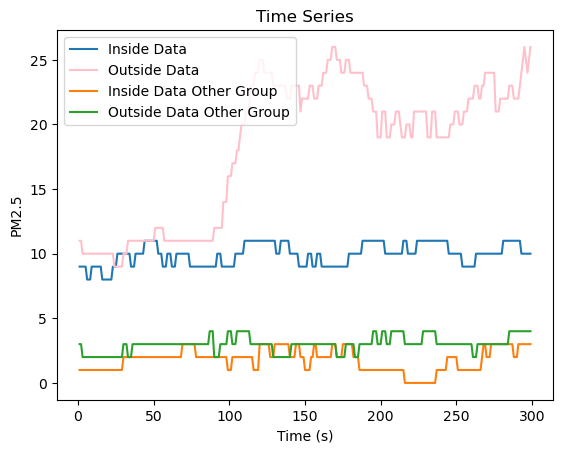

Average inside PM2.5: 9.933110367892976
Average outside PM2.5: 18.304347826086957
STD inside PM2.5: 0.8433533308535264
STD outside PM2.5: 5.517774364652625
Mean Uncertainty inside PM2.5: 0.04877238241560592
Mean Uncertainty inside PM2.5: 0.3191011306299147
Average inside PM2.5 other group: 1.7725752508361203
Average outside PM2.5 other group: 2.9866220735785953
STD inside PM2.5 other group: 0.8742605419286816
STD outside PM2.5 other group: 0.6118847692858473
Mean Uncertainty inside PM2.5 other group: 0.050559792582625385
Mean Uncertainty inside PM2.5 other group: 0.03538620987207234


In [48]:
#PM2.5
plt.plot(inside_data["PM2.5"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["PM2.5"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["PM2.5 (standard)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["PM2.5 (standard)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('PM2.5')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside PM2.5:",np.mean(inside_data["PM2.5"].iloc[1:300]))
print("Average outside PM2.5:",np.mean(outside_data["PM2.5"].iloc[1:300]))
print("STD inside PM2.5:",np.std(inside_data["PM2.5"].iloc[1:300]))
print("STD outside PM2.5:",np.std(outside_data["PM2.5"].iloc[1:300]))
print("Mean Uncertainty inside PM2.5:",(np.std(inside_data["PM2.5"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM2.5:",(np.std(outside_data["PM2.5"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM2.5 other group:",np.mean(inside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("Average outside PM2.5 other group:",np.mean(outside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("STD inside PM2.5 other group:",np.std(inside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("STD outside PM2.5 other group:",np.std(outside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM2.5 other group:",(np.std(inside_data_other["PM2.5 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM2.5 other group:",(np.std(outside_data_other["PM2.5 (standard)"].iloc[1:300]))/np.sqrt(299))

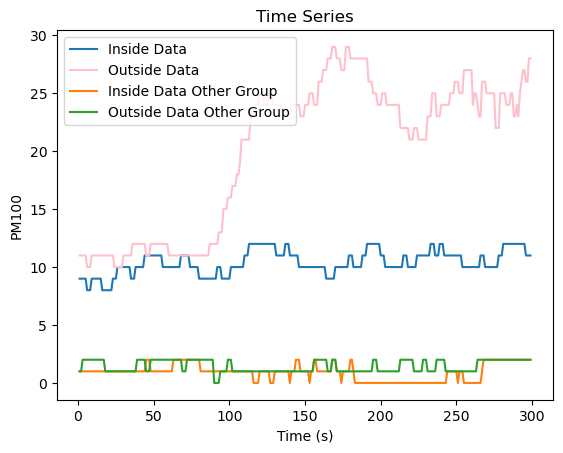

Average inside PM100: 10.397993311036789
Average outside PM100: 20.08361204013378
STD inside PM100: 1.030697390276676
STD outside PM100: 6.458747328507326
Mean Uncertainty inside PM100: 0.059606769113563725
Mean Uncertainty inside PM100: 0.373519002187285
Average inside PM100 other group: 0.9297658862876255
Average outside PM100 other group: 1.4280936454849498
STD inside PM100 other group: 0.697643150369628
STD outside PM100 other group: 0.5211384931313031
Mean Uncertainty inside PM100 other group: 0.04034574510427249
Mean Uncertainty inside PM100 other group: 0.03013821722002185


In [49]:
#PM100
plt.plot(inside_data["PM100"].iloc[1:300], label="Inside Data")
plt.plot(outside_data["PM100"].iloc[1:300], label="Outside Data", color="pink")
plt.plot(inside_data_other["PM1.0 (standard)"].iloc[1:300], label="Inside Data Other Group")
plt.plot(outside_data_other["PM1.0 (standard)"].iloc[1:300], label="Outside Data Other Group")
plt.ylabel('PM100')  
plt.xlabel('Time (s)')  
plt.title("Time Series")  
plt.legend()
plt.show()

print("Average inside PM100:",np.mean(inside_data["PM100"].iloc[1:300]))
print("Average outside PM100:",np.mean(outside_data["PM100"].iloc[1:300]))
print("STD inside PM100:",np.std(inside_data["PM100"].iloc[1:300]))
print("STD outside PM100:",np.std(outside_data["PM100"].iloc[1:300]))
print("Mean Uncertainty inside PM100:",(np.std(inside_data["PM100"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM100:",(np.std(outside_data["PM100"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM100 other group:",np.mean(inside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("Average outside PM100 other group:",np.mean(outside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("STD inside PM100 other group:",np.std(inside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("STD outside PM100 other group:",np.std(outside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM100 other group:",(np.std(inside_data_other["PM1.0 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM100 other group:",(np.std(outside_data_other["PM1.0 (standard)"].iloc[1:300]))/np.sqrt(299))

In [50]:
#HISTOGRAM

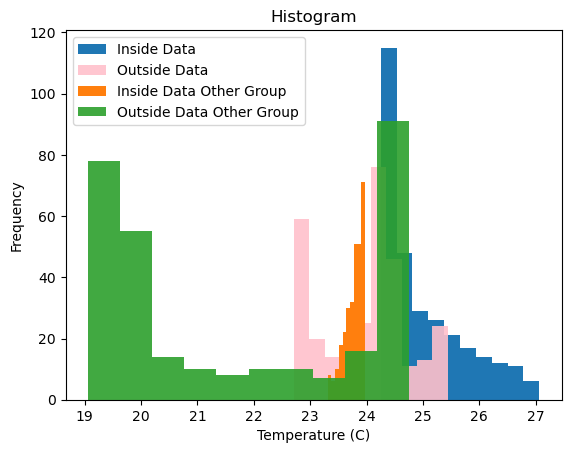

Average inside temp (C): 24.987762855351168
Average outside temp (C): 23.972576818561873
STD inside temp (C): 0.7439041635070531
STD outside temp (C): 0.7841322442192721
Mean Uncertainty inside Temperature (C): 0.04302108857079843
Mean Uncertainty inside Temperature (C): 0.04534753854682036
Average inside temp (C) other group: 23.765150372608698
Average outside temp (C) other group: 21.72739888297659
STD inside temp (C) other group: 0.15896101023963866
STD outside temp (C) other group: 2.2511368040311797
Mean Uncertainty inside Temperature (C) other group: 0.009192952582202145
Mean Uncertainty inside Temperature (C) other group: 0.13018660276699912


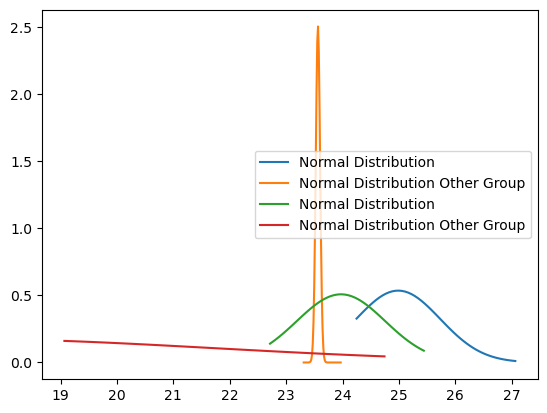

In [51]:
#temp
plt.hist(inside_data["Temperature (C)"].iloc[1:300], bins=10, label="Inside Data")
plt.hist(outside_data["Temperature (C)"].iloc[1:300], bins=10, label="Outside Data", color="pink", alpha=0.9) 
plt.hist(inside_data_other["Temperature (C)"].iloc[1:300], bins=10, label="Inside Data Other Group")
plt.hist(outside_data_other["Temperature (C)"].iloc[1:300], bins=10, label="Outside Data Other Group", alpha=0.9) 
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["Temperature (C)"].iloc[1:300])
std_inside = np.std(inside_data["Temperature (C)"].iloc[1:300])
x = np.linspace(min(inside_data["Temperature (C)"].iloc[1:300]), max(inside_data["Temperature (C)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["Temperature (C)"].iloc[1:300])
std_outside = np.std(outside_data["Temperature (C)"].iloc[1:300])
x = np.linspace(min(outside_data["Temperature (C)"].iloc[1:300]), max(outside_data["Temperature (C)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)

inside_mean_o = np.mean(inside_data_other["Temperature (C)"].iloc[1:300])
std_inside_o = np.std(inside_data_other["Temperature (C)"].iloc[1:300])
z = np.linspace(min(inside_data_other["Temperature (C)"].iloc[1:300]), max(inside_data_other["Temperature (C)"].iloc[1:300]))
h = norm.pdf(x, inside_mean_o, std_inside_o)
plt.plot(z, h, label="Normal Distribution Other Group")
outside_mean_o = np.mean(outside_data_other["Temperature (C)"].iloc[1:300])
std_outside_o = np.std(outside_data_other["Temperature (C)"].iloc[1:300])
z = np.linspace(min(outside_data_other["Temperature (C)"].iloc[1:300]), max(outside_data_other["Temperature (C)"].iloc[1:300]))
h = norm.pdf(x, outside_mean_o, std_outside_o)

plt.plot(x, y, label="Normal Distribution")
plt.plot(z, h, label="Normal Distribution Other Group")
plt.legend()

print("Average inside temp (C):",np.mean(inside_data["Temperature (C)"].iloc[1:300]))
print("Average outside temp (C):",np.mean(outside_data["Temperature (C)"].iloc[1:300]))
print("STD inside temp (C):",np.std(inside_data["Temperature (C)"].iloc[1:300]))
print("STD outside temp (C):",np.std(outside_data["Temperature (C)"].iloc[1:300]))
print("Mean Uncertainty inside Temperature (C):",(np.std(inside_data["Temperature (C)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Temperature (C):",(np.std(outside_data["Temperature (C)"].iloc[1:300]))/np.sqrt(299))

print("Average inside temp (C) other group:",np.mean(inside_data_other["Temperature (C)"].iloc[1:300]))
print("Average outside temp (C) other group:",np.mean(outside_data_other["Temperature (C)"].iloc[1:300]))
print("STD inside temp (C) other group:",np.std(inside_data_other["Temperature (C)"].iloc[1:300]))
print("STD outside temp (C) other group:",np.std(outside_data_other["Temperature (C)"].iloc[1:300]))
print("Mean Uncertainty inside Temperature (C) other group:",(np.std(inside_data_other["Temperature (C)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Temperature (C) other group:",(np.std(outside_data_other["Temperature (C)"].iloc[1:300]))/np.sqrt(299))

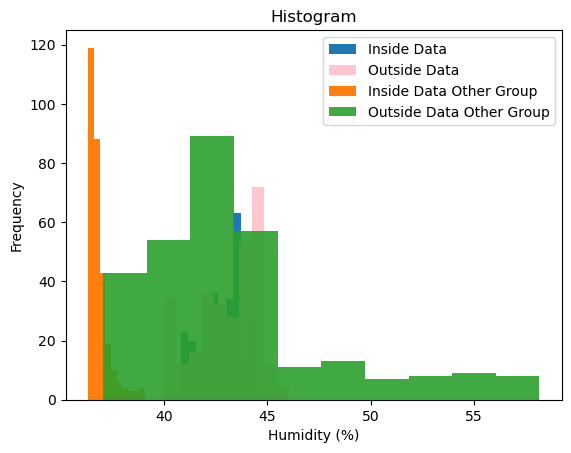

Average inside humidity (%): 42.76270687063147
Average outside humidity (%): 43.03976036466326
STD inside humidity (%): 0.9549757337601661
STD outside humidity (%): 1.4994398860207097
Mean Uncertainty inside Humidity (%): 0.055227672649892076
Mean Uncertainty inside Humidity (%): 0.08671484756715338
Average inside humidity (%) other group: 36.82455757491639
Average outside humidity (%) other group: 43.38535661331104
STD inside humidity (%) other group: 0.5120208856902423
STD outside humidity (%) other group: 4.692093968778796
Mean Uncertainty inside Humidity (%) other group: 0.029610932367324653
Mean Uncertainty inside Humidity (% other group: 0.2713508004333515


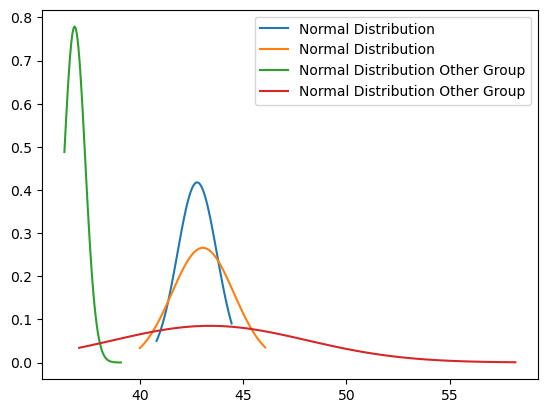

In [52]:
#Humidity (%)	
plt.hist(inside_data["Humidity (%)"].iloc[1:300], bins=10, label="Inside Data")
plt.hist(outside_data["Humidity (%)"].iloc[1:300], bins=10, label="Outside Data", color="pink", alpha=0.9) 
plt.hist(inside_data_other["Humidity (%)"].iloc[1:300], bins=10, label="Inside Data Other Group")
plt.hist(outside_data_other["Humidity (%)"].iloc[1:300], bins=10, label="Outside Data Other Group", alpha=0.9) 
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["Humidity (%)"].iloc[1:300])
std_inside = np.std(inside_data["Humidity (%)"].iloc[1:300])
x = np.linspace(min(inside_data["Humidity (%)"].iloc[1:300]), max(inside_data["Humidity (%)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["Humidity (%)"].iloc[1:300])
std_outside = np.std(outside_data["Humidity (%)"].iloc[1:300])
x = np.linspace(min(outside_data["Humidity (%)"].iloc[1:300]), max(outside_data["Humidity (%)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean_o = np.mean(inside_data_other["Humidity (%)"].iloc[1:300])
std_inside_o = np.std(inside_data_other["Humidity (%)"].iloc[1:300])
z = np.linspace(min(inside_data_other["Humidity (%)"].iloc[1:300]), max(inside_data_other["Humidity (%)"].iloc[1:300]))
h = norm.pdf(z, inside_mean_o, std_inside_o)
plt.plot(z, h, label="Normal Distribution Other Group")
outside_mean_o = np.mean(outside_data_other["Humidity (%)"].iloc[1:300])
std_outside_o = np.std(outside_data_other["Humidity (%)"].iloc[1:300])
z = np.linspace(min(outside_data_other["Humidity (%)"].iloc[1:300]), max(outside_data_other["Humidity (%)"].iloc[1:300]))
h = norm.pdf(z, outside_mean_o, std_outside_o)
plt.plot(z, h, label="Normal Distribution Other Group")
plt.legend()

print("Average inside humidity (%):",np.mean(inside_data["Humidity (%)"].iloc[1:300]))
print("Average outside humidity (%):",np.mean(outside_data["Humidity (%)"].iloc[1:300]))
print("STD inside humidity (%):",np.std(inside_data["Humidity (%)"].iloc[1:300]))
print("STD outside humidity (%):",np.std(outside_data["Humidity (%)"].iloc[1:300]))
print("Mean Uncertainty inside Humidity (%):",(np.std(inside_data["Humidity (%)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Humidity (%):",(np.std(outside_data["Humidity (%)"].iloc[1:300]))/np.sqrt(299))

print("Average inside humidity (%) other group:",np.mean(inside_data_other["Humidity (%)"].iloc[1:300]))
print("Average outside humidity (%) other group:",np.mean(outside_data_other["Humidity (%)"].iloc[1:300]))
print("STD inside humidity (%) other group:",np.std(inside_data_other["Humidity (%)"].iloc[1:300]))
print("STD outside humidity (%) other group:",np.std(outside_data_other["Humidity (%)"].iloc[1:300]))
print("Mean Uncertainty inside Humidity (%) other group:",(np.std(inside_data_other["Humidity (%)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Humidity (% other group:",(np.std(outside_data_other["Humidity (%)"].iloc[1:300]))/np.sqrt(299))

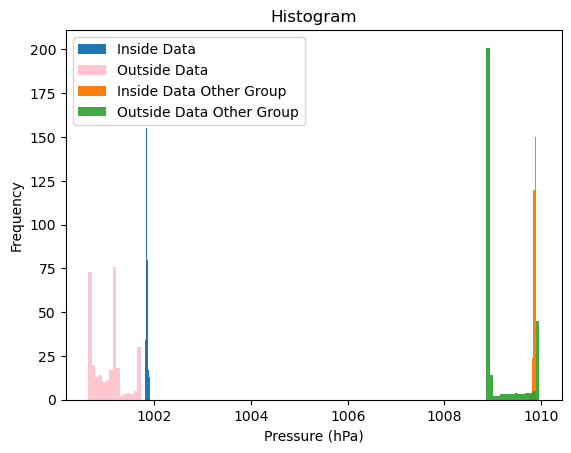

Average inside pressure (hPa): 1001.8473094482531
Average outside pressure (hPa): 1001.0476287805681
STD inside pressure (hPa): 0.017662437111490896
STD outside pressure (hPa): 0.3233676150134457
Mean Uncertainty inside Pressure (hPa): 0.0010214451116489854
Mean Uncertainty inside Pressure (hPa): 0.01870083202765862
Average inside pressure (hPa) other group: 1009.8696091839464
Average outside pressure (hPa) other group: 1009.1396701538459
STD inside pressure (hPa) other group: 0.019446736142901117
STD outside pressure (hPa) other group: 0.40201163440424914
Mean Uncertainty inside Pressure (hPa) other group: 0.0011246337889447284
Mean Uncertainty inside Pressure (hPa) other group: 0.02324893310001304


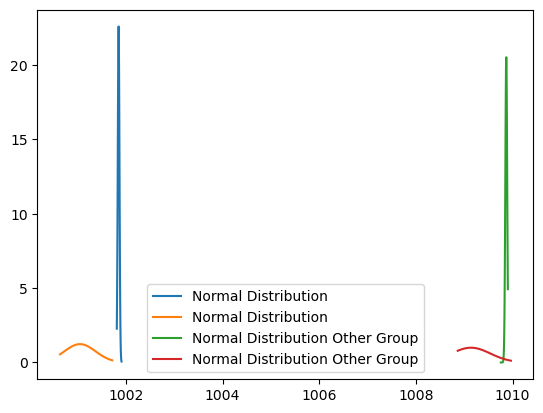

In [53]:
#Pressure (hPa)
plt.hist(inside_data["Pressure (hPa)"].iloc[1:300], bins=5, label="Inside Data")
plt.hist(outside_data["Pressure (hPa)"].iloc[1:300], bins=15, label="Outside Data", color="pink", alpha=0.9)
plt.hist(inside_data_other["Pressure (hPa)"].iloc[1:300], bins=5, label="Inside Data Other Group")
plt.hist(outside_data_other["Pressure (hPa)"].iloc[1:300], bins=15, label="Outside Data Other Group", alpha=0.9)
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["Pressure (hPa)"].iloc[1:300])
std_inside = np.std(inside_data["Pressure (hPa)"].iloc[1:300])
x = np.linspace(min(inside_data["Pressure (hPa)"].iloc[1:300]), max(inside_data["Pressure (hPa)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["Pressure (hPa)"].iloc[1:300])
std_outside = np.std(outside_data["Pressure (hPa)"].iloc[1:300])
x = np.linspace(min(outside_data["Pressure (hPa)"].iloc[1:300]), max(outside_data["Pressure (hPa)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean_o = np.mean(inside_data_other["Pressure (hPa)"].iloc[1:300])
std_inside_o = np.std(inside_data_other["Pressure (hPa)"].iloc[1:300])
x = np.linspace(min(inside_data_other["Pressure (hPa)"].iloc[1:300]), max(inside_data_other["Pressure (hPa)"].iloc[1:300]))
y = norm.pdf(x, inside_mean_o, std_inside_o)
plt.plot(x, y, label="Normal Distribution Other Group")
outside_mean_o = np.mean(outside_data_other["Pressure (hPa)"].iloc[1:300])
std_outside_o = np.std(outside_data_other["Pressure (hPa)"].iloc[1:300])
x = np.linspace(min(outside_data_other["Pressure (hPa)"].iloc[1:300]), max(outside_data_other["Pressure (hPa)"].iloc[1:300]))
y = norm.pdf(x, outside_mean_o, std_outside_o)
plt.plot(x, y, label="Normal Distribution Other Group")
plt.legend()

print("Average inside pressure (hPa):",np.mean(inside_data["Pressure (hPa)"].iloc[1:300]))
print("Average outside pressure (hPa):",np.mean(outside_data["Pressure (hPa)"].iloc[1:300]))
print("STD inside pressure (hPa):",np.std(inside_data["Pressure (hPa)"].iloc[1:300]))
print("STD outside pressure (hPa):",np.std(outside_data["Pressure (hPa)"].iloc[1:300]))
print("Mean Uncertainty inside Pressure (hPa):",(np.std(inside_data["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Pressure (hPa):",(np.std(outside_data["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))

print("Average inside pressure (hPa) other group:",np.mean(inside_data_other["Pressure (hPa)"].iloc[1:300]))
print("Average outside pressure (hPa) other group:",np.mean(outside_data_other["Pressure (hPa)"].iloc[1:300]))
print("STD inside pressure (hPa) other group:",np.std(inside_data_other["Pressure (hPa)"].iloc[1:300]))
print("STD outside pressure (hPa) other group:",np.std(outside_data_other["Pressure (hPa)"].iloc[1:300]))
print("Mean Uncertainty inside Pressure (hPa) other group:",(np.std(inside_data_other["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Pressure (hPa) other group:",(np.std(outside_data_other["Pressure (hPa)"].iloc[1:300]))/np.sqrt(299))

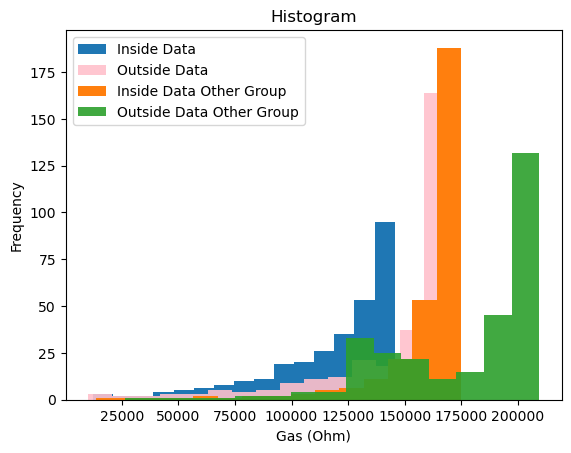

Average inside gas (Ohm): 117189.51505016722
Average outside gas (Ohm): 143406.5016722408
STD inside gas (Ohm): 28728.441415366204
STD outside gas (Ohm): 32445.12765585169
Mean Uncertainty inside Gas (Ohm): 1661.4086642623624
Mean Uncertainty inside Gas (Ohm): 1876.350179292985
Average inside gas (Ohm) other group: 158883.90301003345
Average outside gas (Ohm) other group: 176159.60535117055
STD inside gas (Ohm) other group: 23537.724033763116
STD outside gas (Ohm) other group: 34207.61901536615
Mean Uncertainty inside Gas (Ohm) other group: 1361.2217273225854
Mean Uncertainty inside Gas (Ohm) other group: 1978.2776863598542


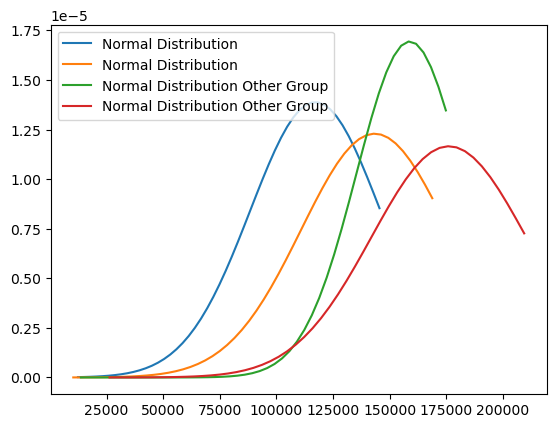

In [54]:
#Gas (Ohm)
plt.hist(inside_data["Gas (Ohm)"].iloc[1:300], bins=15, label="Inside Data")
plt.hist(outside_data["Gas (Ohm)"].iloc[1:300], bins=15, label="Outside Data", color="pink", alpha=0.9)
plt.hist(inside_data_other["Gas (ohm)"].iloc[1:300], bins=15, label="Inside Data Other Group")
plt.hist(outside_data_other["Gas (ohm)"].iloc[1:300], bins=15, label="Outside Data Other Group", alpha=0.9)
plt.xlabel('Gas (Ohm)')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["Gas (Ohm)"].iloc[1:300])
std_inside = np.std(inside_data["Gas (Ohm)"].iloc[1:300])
x = np.linspace(min(inside_data["Gas (Ohm)"].iloc[1:300]), max(inside_data["Gas (Ohm)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["Gas (Ohm)"].iloc[1:300])
std_outside = np.std(outside_data["Gas (Ohm)"].iloc[1:300])
x = np.linspace(min(outside_data["Gas (Ohm)"].iloc[1:300]), max(outside_data["Gas (Ohm)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean = np.mean(inside_data_other["Gas (ohm)"].iloc[1:300])
std_inside = np.std(inside_data_other["Gas (ohm)"].iloc[1:300])
x = np.linspace(min(inside_data_other["Gas (ohm)"].iloc[1:300]), max(inside_data_other["Gas (ohm)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution Other Group")
outside_mean = np.mean(outside_data_other["Gas (ohm)"].iloc[1:300])
std_outside = np.std(outside_data_other["Gas (ohm)"].iloc[1:300])
x = np.linspace(min(outside_data_other["Gas (ohm)"].iloc[1:300]), max(outside_data_other["Gas (ohm)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution Other Group")
plt.legend()

print("Average inside gas (Ohm):",np.mean(inside_data["Gas (Ohm)"].iloc[1:300]))
print("Average outside gas (Ohm):",np.mean(outside_data["Gas (Ohm)"].iloc[1:300]))
print("STD inside gas (Ohm):",np.std(inside_data["Gas (Ohm)"].iloc[1:300]))
print("STD outside gas (Ohm):",np.std(outside_data["Gas (Ohm)"].iloc[1:300]))
print("Mean Uncertainty inside Gas (Ohm):",(np.std(inside_data["Gas (Ohm)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Gas (Ohm):",(np.std(outside_data["Gas (Ohm)"].iloc[1:300]))/np.sqrt(299))

print("Average inside gas (Ohm) other group:",np.mean(inside_data_other["Gas (ohm)"].iloc[1:300]))
print("Average outside gas (Ohm) other group:",np.mean(outside_data_other["Gas (ohm)"].iloc[1:300]))
print("STD inside gas (Ohm) other group:",np.std(inside_data_other["Gas (ohm)"].iloc[1:300]))
print("STD outside gas (Ohm) other group:",np.std(outside_data_other["Gas (ohm)"].iloc[1:300]))
print("Mean Uncertainty inside Gas (Ohm) other group:",(np.std(inside_data_other["Gas (ohm)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside Gas (Ohm) other group:",(np.std(outside_data_other["Gas (ohm)"].iloc[1:300]))/np.sqrt(299))

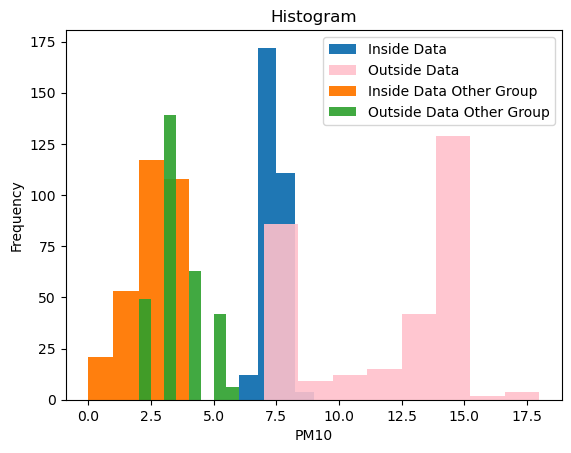

Average inside PM10: 7.357859531772576
Average outside PM10: 11.896321070234114
STD inside PM10: 0.5803615241065916
STD outside PM10: 2.948717737975559
Mean Uncertainty inside PM10: 0.0335631735329527
Mean Uncertainty inside PM10: 0.17052874980249813
Average inside PM10 other group: 2.0936454849498327
Average outside PM10 other group: 3.387959866220736
STD inside PM10 other group: 0.9803724744709789
STD outside PM10 other group: 0.9831296956095262
Mean Uncertainty inside PM10 other group: 0.056696404087525874
Mean Uncertainty inside PM10 other group: 0.056855858303041365


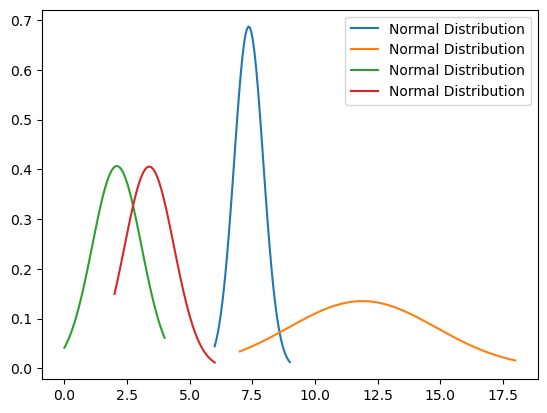

In [55]:
#PM10
plt.hist(inside_data["PM10"].iloc[1:300], bins=4, label="Inside Data")
plt.hist(outside_data["PM10"].iloc[1:300], bins=8, label="Outside Data", color="pink", alpha=0.9)
plt.hist(inside_data_other["PM10 (standard)"].iloc[1:300], bins=4, label="Inside Data Other Group")
plt.hist(outside_data_other["PM10 (standard)"].iloc[1:300], bins=8, label="Outside Data Other Group", alpha=0.9)
plt.xlabel('PM10')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["PM10"].iloc[1:300])
std_inside = np.std(inside_data["PM10"].iloc[1:300])
x = np.linspace(min(inside_data["PM10"].iloc[1:300]), max(inside_data["PM10"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["PM10"].iloc[1:300])
std_outside = np.std(outside_data["PM10"].iloc[1:300])
x = np.linspace(min(outside_data["PM10"].iloc[1:300]), max(outside_data["PM10"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean = np.mean(inside_data_other["PM10 (standard)"].iloc[1:300])
std_inside = np.std(inside_data_other["PM10 (standard)"].iloc[1:300])
x = np.linspace(min(inside_data_other["PM10 (standard)"].iloc[1:300]), max(inside_data_other["PM10 (standard)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data_other["PM10 (standard)"].iloc[1:300])
std_outside = np.std(outside_data_other["PM10 (standard)"].iloc[1:300])
x = np.linspace(min(outside_data_other["PM10 (standard)"].iloc[1:300]), max(outside_data_other["PM10 (standard)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")
plt.legend()

print("Average inside PM10:",np.mean(inside_data["PM10"].iloc[1:300]))
print("Average outside PM10:",np.mean(outside_data["PM10"].iloc[1:300]))
print("STD inside PM10:",np.std(inside_data["PM10"].iloc[1:300]))
print("STD outside PM10:",np.std(outside_data["PM10"].iloc[1:300]))
print("Mean Uncertainty inside PM10:",(np.std(inside_data["PM10"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM10:",(np.std(outside_data["PM10"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM10 other group:",np.mean(inside_data_other["PM10 (standard)"].iloc[1:300]))
print("Average outside PM10 other group:",np.mean(outside_data_other["PM10 (standard)"].iloc[1:300]))
print("STD inside PM10 other group:",np.std(inside_data_other["PM10 (standard)"].iloc[1:300]))
print("STD outside PM10 other group:",np.std(outside_data_other["PM10 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM10 other group:",(np.std(inside_data_other["PM10 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM10 other group:",(np.std(outside_data_other["PM10 (standard)"].iloc[1:300]))/np.sqrt(299))

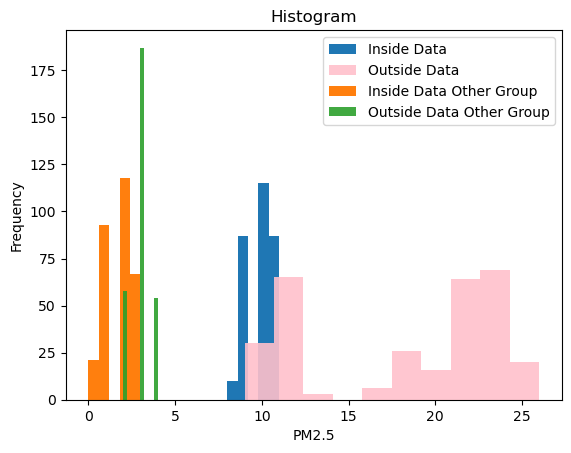

Average inside PM2.5: 9.933110367892976
Average outside PM2.5: 18.304347826086957
STD inside PM2.5: 0.8433533308535264
STD outside PM2.5: 5.517774364652625
Mean Uncertainty inside PM2.5: 0.04877238241560592
Mean Uncertainty inside PM2.5: 0.3191011306299147
Average inside PM2.5 other group: 1.7725752508361203
Average outside PM2.5 other group: 2.9866220735785953
STD inside PM2.5 other group: 0.8742605419286816
STD outside PM2.5 other group: 0.6118847692858473
Mean Uncertainty inside PM2.5 other group: 0.050559792582625385
Mean Uncertainty inside PM2.5 other group: 0.03538620987207234


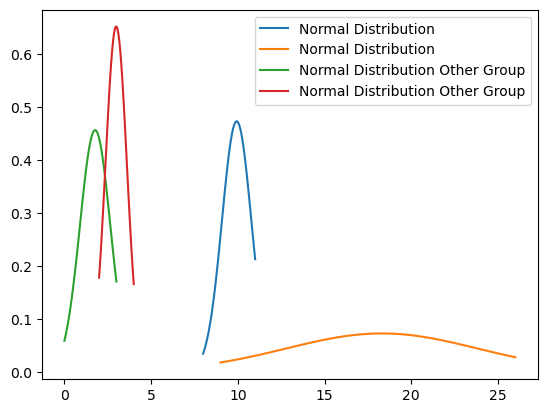

In [56]:
#PM2.5
plt.hist(inside_data["PM2.5"].iloc[1:300], bins=5, label="Inside Data")
plt.hist(outside_data["PM2.5"].iloc[1:300], bins=10, label="Outside Data", color="pink", alpha=0.9)
plt.hist(inside_data_other["PM2.5 (standard)"].iloc[1:300], bins=5, label="Inside Data Other Group")
plt.hist(outside_data_other["PM2.5 (standard)"].iloc[1:300], bins=10, label="Outside Data Other Group", alpha=0.9)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["PM2.5"].iloc[1:300])
std_inside = np.std(inside_data["PM2.5"].iloc[1:300])
x = np.linspace(min(inside_data["PM2.5"].iloc[1:300]), max(inside_data["PM2.5"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["PM2.5"].iloc[1:300])
std_outside = np.std(outside_data["PM2.5"].iloc[1:300])
x = np.linspace(min(outside_data["PM2.5"].iloc[1:300]), max(outside_data["PM2.5"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean = np.mean(inside_data_other["PM2.5 (standard)"].iloc[1:300])
std_inside = np.std(inside_data_other["PM2.5 (standard)"].iloc[1:300])
x = np.linspace(min(inside_data_other["PM2.5 (standard)"].iloc[1:300]), max(inside_data_other["PM2.5 (standard)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution Other Group")
outside_mean = np.mean(outside_data_other["PM2.5 (standard)"].iloc[1:300])
std_outside = np.std(outside_data_other["PM2.5 (standard)"].iloc[1:300])
x = np.linspace(min(outside_data_other["PM2.5 (standard)"].iloc[1:300]), max(outside_data_other["PM2.5 (standard)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution Other Group")
plt.legend()

print("Average inside PM2.5:",np.mean(inside_data["PM2.5"].iloc[1:300]))
print("Average outside PM2.5:",np.mean(outside_data["PM2.5"].iloc[1:300]))
print("STD inside PM2.5:",np.std(inside_data["PM2.5"].iloc[1:300]))
print("STD outside PM2.5:",np.std(outside_data["PM2.5"].iloc[1:300]))
print("Mean Uncertainty inside PM2.5:",(np.std(inside_data["PM2.5"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM2.5:",(np.std(outside_data["PM2.5"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM2.5 other group:",np.mean(inside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("Average outside PM2.5 other group:",np.mean(outside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("STD inside PM2.5 other group:",np.std(inside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("STD outside PM2.5 other group:",np.std(outside_data_other["PM2.5 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM2.5 other group:",(np.std(inside_data_other["PM2.5 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM2.5 other group:",(np.std(outside_data_other["PM2.5 (standard)"].iloc[1:300]))/np.sqrt(299))

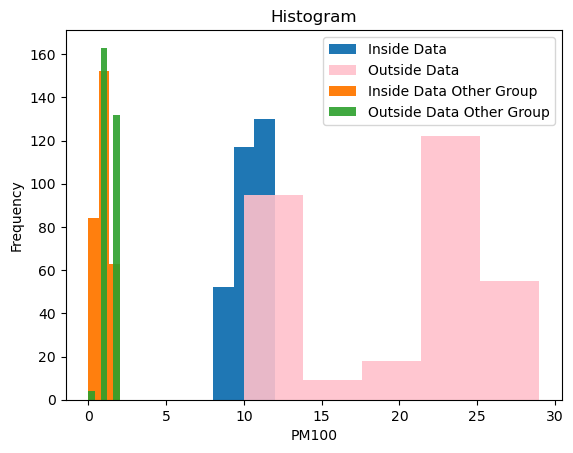

Average inside PM100: 10.397993311036789
Average outside PM100: 20.08361204013378
STD inside PM100: 1.030697390276676
STD outside PM100: 6.458747328507326
Mean Uncertainty inside PM100: 0.059606769113563725
Mean Uncertainty inside PM100: 0.373519002187285
Average inside PM100 other group: 0.9297658862876255
Average outside PM100 other group: 1.4280936454849498
STD inside PM100 other group: 0.697643150369628
STD outside PM100 other group: 0.5211384931313031
Mean Uncertainty inside PM100 other group: 0.04034574510427249
Mean Uncertainty inside PM100 other group: 0.03013821722002185


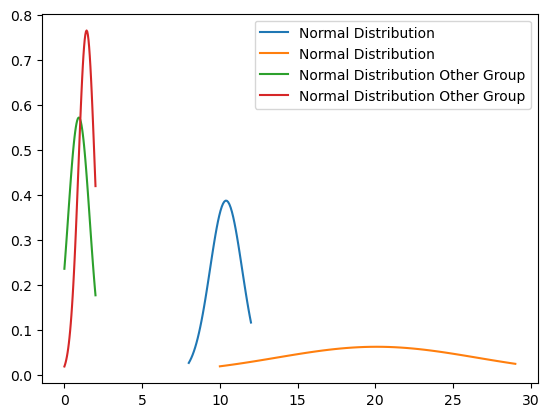

In [57]:
#PM100
plt.hist(inside_data["PM100"].iloc[1:300], bins=3, label="Inside Data")
plt.hist(outside_data["PM100"].iloc[1:300], bins=5, label="Outside Data", color="pink", alpha=0.9)
plt.hist(inside_data_other["PM1.0 (standard)"].iloc[1:300], bins=3, label="Inside Data Other Group")
plt.hist(outside_data_other["PM1.0 (standard)"].iloc[1:300], bins=5, label="Outside Data Other Group", alpha=0.9)
plt.xlabel('PM100')
plt.ylabel('Frequency')  
plt.title("Histogram")
plt.legend()
plt.show()

inside_mean = np.mean(inside_data["PM100"].iloc[1:300])
std_inside = np.std(inside_data["PM100"].iloc[1:300])
x = np.linspace(min(inside_data["PM100"].iloc[1:300]), max(inside_data["PM100"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution")
outside_mean = np.mean(outside_data["PM100"].iloc[1:300])
std_outside = np.std(outside_data["PM100"].iloc[1:300])
x = np.linspace(min(outside_data["PM100"].iloc[1:300]), max(outside_data["PM100"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution")

inside_mean = np.mean(inside_data_other["PM1.0 (standard)"].iloc[1:300])
std_inside = np.std(inside_data_other["PM1.0 (standard)"].iloc[1:300])
x = np.linspace(min(inside_data_other["PM1.0 (standard)"].iloc[1:300]), max(inside_data_other["PM1.0 (standard)"].iloc[1:300]))
y = norm.pdf(x, inside_mean, std_inside)
plt.plot(x, y, label="Normal Distribution Other Group")
outside_mean = np.mean(outside_data_other["PM1.0 (standard)"].iloc[1:300])
std_outside = np.std(outside_data_other["PM1.0 (standard)"].iloc[1:300])
x = np.linspace(min(outside_data_other["PM1.0 (standard)"].iloc[1:300]), max(outside_data_other["PM1.0 (standard)"].iloc[1:300]))
y = norm.pdf(x, outside_mean, std_outside)
plt.plot(x, y, label="Normal Distribution Other Group")
plt.legend()

print("Average inside PM100:",np.mean(inside_data["PM100"].iloc[1:300]))
print("Average outside PM100:",np.mean(outside_data["PM100"].iloc[1:300]))
print("STD inside PM100:",np.std(inside_data["PM100"].iloc[1:300]))
print("STD outside PM100:",np.std(outside_data["PM100"].iloc[1:300]))
print("Mean Uncertainty inside PM100:",(np.std(inside_data["PM100"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM100:",(np.std(outside_data["PM100"].iloc[1:300]))/np.sqrt(299))

print("Average inside PM100 other group:",np.mean(inside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("Average outside PM100 other group:",np.mean(outside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("STD inside PM100 other group:",np.std(inside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("STD outside PM100 other group:",np.std(outside_data_other["PM1.0 (standard)"].iloc[1:300]))
print("Mean Uncertainty inside PM100 other group:",(np.std(inside_data_other["PM1.0 (standard)"].iloc[1:300]))/np.sqrt(299))
print("Mean Uncertainty inside PM100 other group:",(np.std(outside_data_other["PM1.0 (standard)"].iloc[1:300]))/np.sqrt(299))